In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-22948'
nsa_z = 0.119399
plateifu = '7992-9102'

In [4]:
data = fits.open('/Users/natachaupra/Downloads/manga-7992-9102-LOGCUBE.fits.gz')

In [5]:
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

In [6]:
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [7]:
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [8]:
wave = data['WAVE'].data

In [9]:
flux_header = data['FLUX'].header

In [10]:
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        sumflux = np.add(sumflux, flux[i,j])

In [11]:
a = 5007 * (1 + nsa_z)

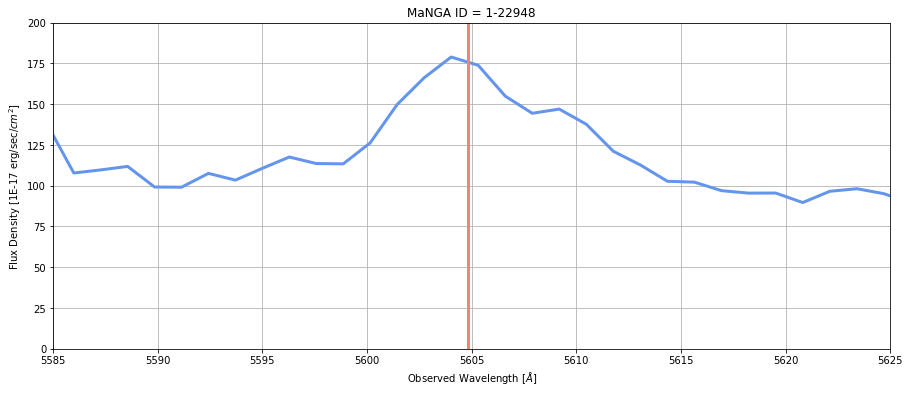

In [39]:
start = 5585
end = 5625
height = 200
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

In [13]:
# select peak region
index = 0
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[4:25]
print(yaxis)
print(len(yaxis))

for i in yaxis:
    print(wave[i])

[1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906]
21
5591.135275705602
5592.422830408998
5593.7106816169635
5594.998829397764
5596.287273819709
5597.576014951099
5598.865052860273
5600.154387615563
5601.444019285339
5602.733947937972
5604.024173641845
5605.314696465377
5606.60551647698
5607.8966337451
5609.188048338182
5610.479760324706
5611.771769773147
5613.064076752015
5614.356681329818
5615.649583575098
5616.942783556393


In [14]:
flux_compare = [] 
ivar_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(4096, 21)

In [15]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

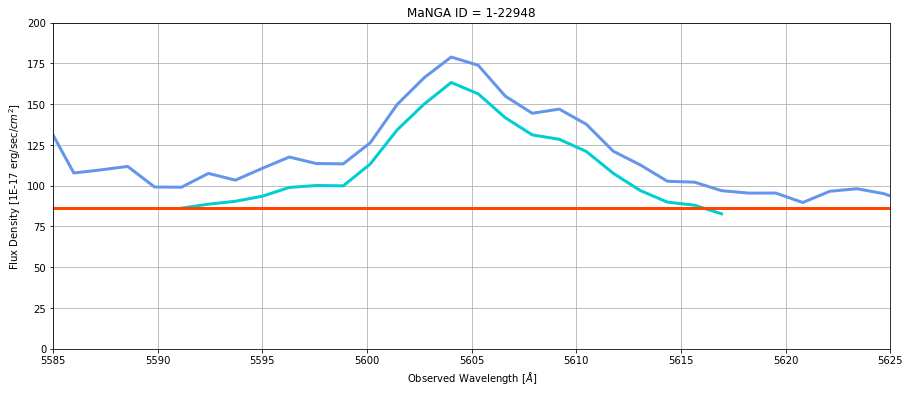

In [45]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [17]:
line1 = 5615
line2 = 5618
height1 = 75
height2 = 100

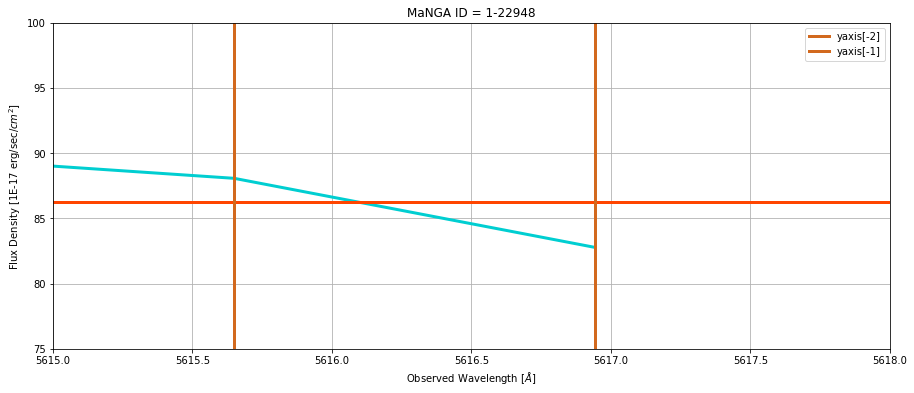

In [47]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [19]:
index2 = np.where(yaxis == yaxis[-2])[0][0]
print(index2)
sumresult[index2]

19


88.06757699884474

In [20]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis[-2]], wave[yaxis[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5615.649583575098, 5616.942783556393]
[88.06757699884474, 82.77353848330677]
88.06757699884474


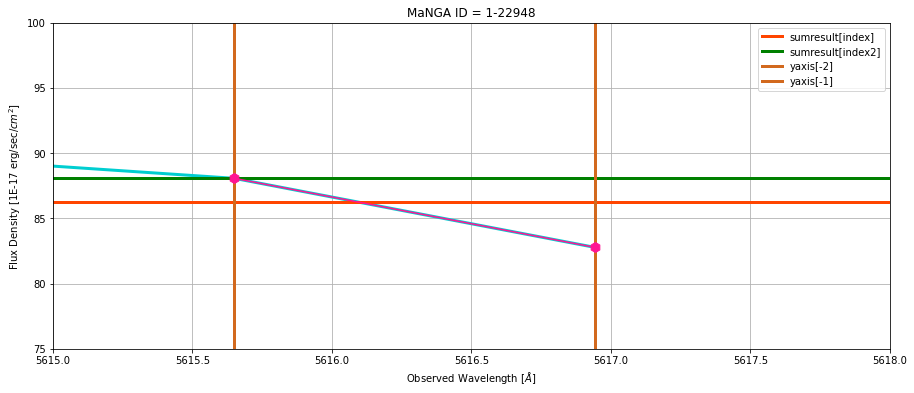

In [48]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'sumresult[index]')
plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.plot(x, y, marker = 'h', ms = 10, color = 'deeppink')



plt.legend()
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [22]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-4.093750844504845

In [23]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

23077.137802202684

In [24]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [25]:
xval = func(sumresult[index], m, c)
xval

86.25794780999422 -4.093750844504845 23077.137802202684


5616.091630308665

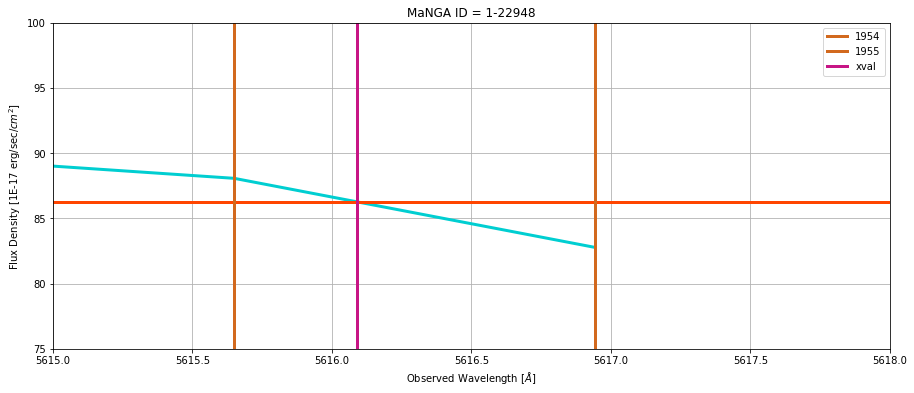

In [49]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = '1954')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = '1955')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = 'xval')

plt.legend()
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [27]:
xcoord = []
ycoord = []

for i in range(yaxis[0], yaxis[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(21, 21, 21)

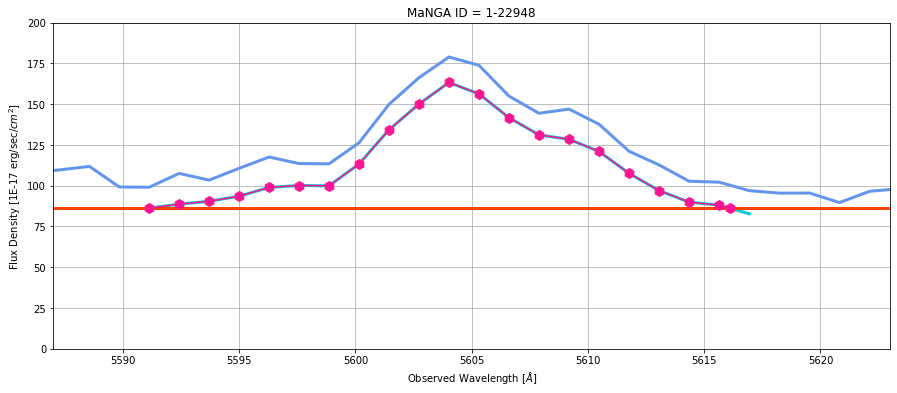

In [50]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start+2, end-2)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.plot(xcoord, ycoord, color = 'deeppink', marker = 'h', ms = 10)
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [29]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [30]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

2868.3301656915655

In [31]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

2152.6839328787273

In [32]:
fluxarea = finalarea - subtract
fluxarea

715.6462328128382

In [33]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.119399

### With the subtraction

In [34]:
luminosity_distance = Mpc_to_cm(556.7)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.717798056e+27 cm / 2.6537039283939675e+41 erg/s (?)


In [35]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [36]:
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

M_BH / M_sol = 6731615.8147050915
log(luminosity) = 41.42385246734628
log(M_BH / M_sol) = 6.8281193220520455
log(luminosity / sol_lum) = 7.8388431874438185


### Without the subtraction

In [37]:
luminosity_without_subtract = luminosity_calc(luminosity_distance, finalarea)
print(luminosity_distance, 'cm', '/', luminosity_without_subtract, ('erg/s (?)'))

1.717798056e+27 cm / 1.0636119746915934e+42 erg/s (?)


In [38]:
print('M_BH / M_sol =',BH_calc(luminosity_without_subtract))
print('log(luminosity) =',np.log10(luminosity_without_subtract))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_without_subtract)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_without_subtract / sol_luminosity))

M_BH / M_sol = 26980504.919690866
log(luminosity) = 42.026783218198084
log(M_BH / M_sol) = 7.431050072903849
log(luminosity / sol_lum) = 8.441773938295622
